<a href="https://colab.research.google.com/github/ugursirvermez/PyTorch_Education/blob/main/pytorch_all_one_place.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BÜTÜN AŞAMALARI BİR ARAYA GETİERECEĞİZ

#1. VERİLER

In [25]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#Torch verisiyonu kontrol edelim
print(torch.__version__)

2.4.0+cu121


GPU OR CPU ?

In [26]:
#Agnostik kod kullanıyoruz.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cpu


# DOĞRUSAL REGRESYON İÇİN VERİ OLUŞTURMA

In [27]:
#Verileri Doğrusal regresyon modeli için oluşturalım.
# y = agirlik * X + eğilim -> y = weight * X + bias
weight = 0.923
bias = 0.44

#Değer aralığını yaratalım.
start = 0
end = 1
step = 0.05

#X ve Y değerlerini olusturalım. (Degiskenleri ve içerikleri olusturuyoruz)
X = torch.arange(start, end, step).unsqueeze(dim=1) #unsqueeze etmezsek hata verir.
y = weight * X +bias
print(X[:10], y[:10])

tensor([[0.0000],
        [0.0500],
        [0.1000],
        [0.1500],
        [0.2000],
        [0.2500],
        [0.3000],
        [0.3500],
        [0.4000],
        [0.4500]]) tensor([[0.4400],
        [0.4861],
        [0.5323],
        [0.5784],
        [0.6246],
        [0.6708],
        [0.7169],
        [0.7630],
        [0.8092],
        [0.8554]])


#Verileri split etme
  Ayırma işlemi de deniyor.

In [28]:
#verileri split etme işlemi
train_split = int(0.8 * len(X))
X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test =y[train_split:]
print(len(X_train), len(y_train), len(X_test), len(y_test))


16 16 4 4


#Plotlib Kullanarak Verilerimizi Görselleştirelim

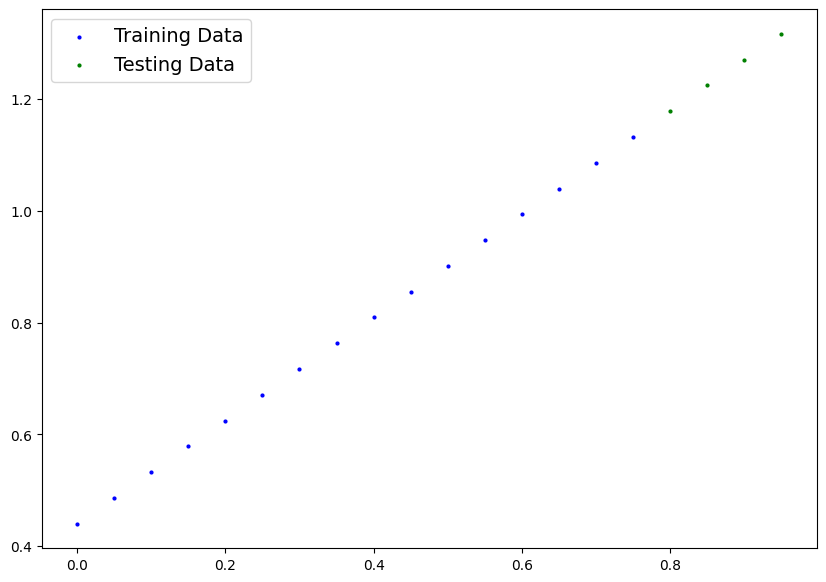

In [29]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions): #Parametreleri fonksiyonu kullanırken dolduracağız.
	plt.figure(figsize=(10,7)) #Grafiğin kaça kaç çizileceğini söylüyorum.
  #Scatter çizmeyi ifade ediyor.
	plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data") #veriyi mavi renkte(c), 4 boyutunda(s) gormek istiyorum.
	plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data") #veriyi yeşil renkte(c), 4 boyutunda(s) gormek istiyorum.
	#eğer tahmin varsa...
	if predictions is not None:
		#tahmini yazdir
		plt.scatter(test_data, predictions, c="r", s=4, label="Predictions"),

	#Show the legend
	plt.legend(prop={"size": 14});

plot_predictions(X_train, y_train, X_test, y_test,None)

# PYTORCH DOĞRUSAL MODELİ OLUŞTURMA

In [30]:
#Doğrusal modeli nn.Module ile sınıfla oluşturalım.
class LinearRegressionModelV2(nn.Module):
	#Initialize etme yani başlatma işleminde olacaklar
	def __init__(self):
		super().__init__()
		#nn.Linear() sayesinde modelin parametrelerini oluşturuyoruz.
		self.linear_layer = nn.Linear(in_features=1, out_features=1) #x ve y içeriğimizi oluşturduk.

	def forward(self, x) -> torch.Tensor: #Devam etme fonksiyonu
		return self.linear_layer(x) #Burada doğrusal denklemi uygulanıyor.

torch.manual_seed(42) #Manual seed yapma
model_1 = LinearRegressionModelV2()
print(model_1)
print(model_1.state_dict())

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])
